In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
data = pd.read_csv("Fraud.csv")

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
#Cheking missing values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Hence, there isn't any missing value in the data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#creating a copy of original dataset:

new_df=data.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
# Checking how many attributes are dtype: object

obj = new_df.select_dtypes(include = "object").columns
print (obj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


Here we have "nameOrig" and "nameDest" and they are the objects with attribute "name", which is not significant while predicting fraudulent transactions. Hence we'll drop these two variables from our new data frame.

In [10]:
#Conversion of object to numeric by encoding:

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in obj:
    new_df[i] = l.fit_transform(new_df[i].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [11]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


* Checking Multicollinearity:

<AxesSubplot: >

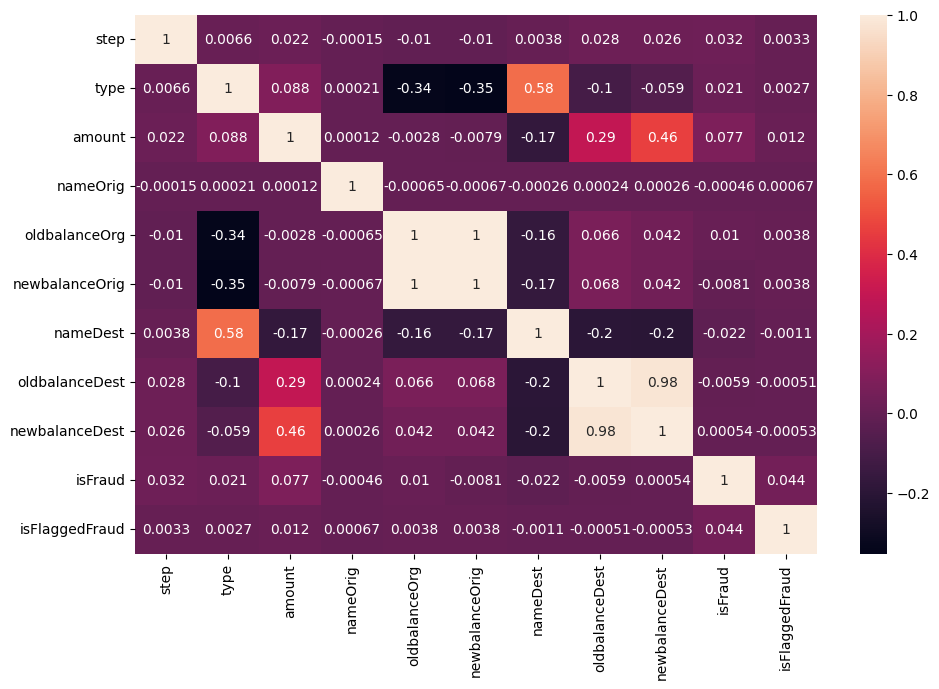

In [12]:
import seaborn as sns
corr=new_df.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True)

Here we can see "oldbalanceOrig" and "newbalanceOrig" are highly correlated. Similarly "oldbalanceDest" and "newbalanceDest"

## How did you select variables to be included in the model?

Using Correlation Heatmap.

We'll merge pairs of Variables with high correlation value and reduce variables, and this process will not affect our model building. Hence we can proceed with the remaining variables.

In [14]:
new_df['Actual_balance_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_balance_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['Path'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   type                 int32  
 1   amount               float64
 2   isFraud              int64  
 3   isFlaggedFraud       int64  
 4   Actual_balance_orig  float64
 5   Actual_balance_dest  float64
 6   Path                 float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 315.5 MB


<AxesSubplot: >

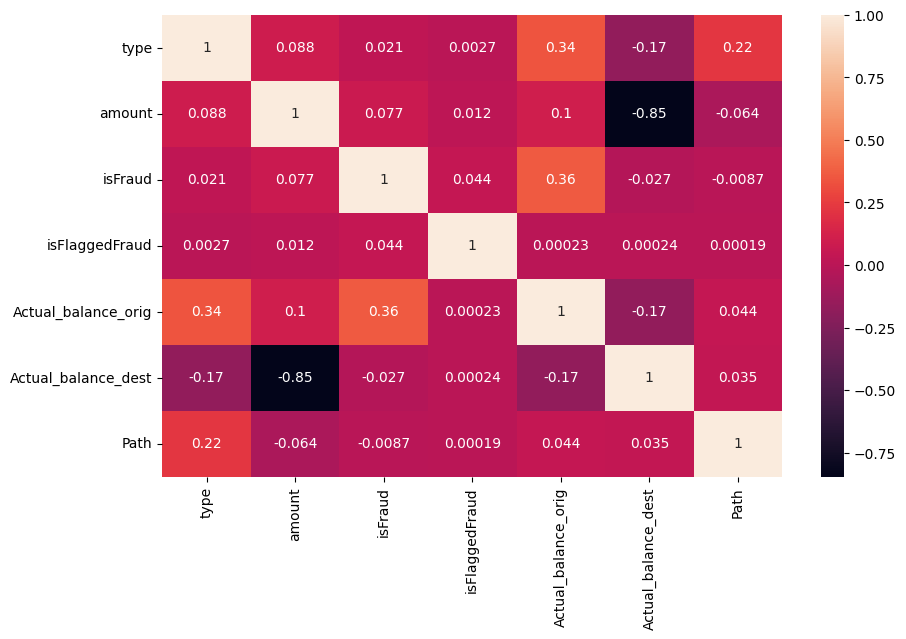

In [15]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

#### These new independent variables will be our key factors for the predicition of fraudulent transactions.

## Model Building :

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Performing Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [18]:
# Splitting the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 1)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## Model Training:

In [19]:
# DECISION TREE (We are using Decision Tree Classifier because of the imbalanced data)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [20]:
Y_pred_dt = decision_tree.predict(X_test)

#Print accuracy of training data:
X_train_prediction = decision_tree.predict(X_train)
tr_acc_dt = accuracy_score(X_train_prediction, Y_train)

print("Decision Tree Accuracy on Training data: ", tr_acc_dt)

#Print accuracy of test data:
X_test_prediction = decision_tree.predict(X_test)
test_acc_dt = accuracy_score(X_test_prediction, Y_test)

print("Decision Tree Accuracy on Test data: ", test_acc_dt)

Decision Tree Accuracy on Training data:  1.0
Decision Tree Accuracy on Test data:  0.9992199230296115


In [21]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1752
False Positives: 773
True Negatives: 1905545
False Negatives: 716


In [22]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[1905545     773]
 [    716    1752]]


In [23]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.69      0.71      0.70      2468

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



Here precision is not so good. So we'll try to build model with Random forest and then we will see if precision will get improve or not.

In [24]:
#RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
Y_pred_rf = random_forest.predict(X_test)

#Print accuracy of training data:
X_train_prediction = random_forest.predict(X_train)
tr_acc_rf = accuracy_score(X_train_prediction, Y_train)

print("Random Forest Accuracy on Training data: ", tr_acc_rf)

#Print accuracy of test data:
X_test_prediction = random_forest.predict(X_test)
test_acc_rf = accuracy_score(X_test_prediction, Y_test)

print("Random Forest Accuracy on Test data: ", test_acc_rf)

Random Forest Accuracy on Training data:  0.9999984283204089
Random Forest Accuracy on Test data:  0.9995803615491732


In [26]:
print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Random Forest
True Positives: 1749
False Positives: 82
True Negatives: 1906236
False Negatives: 719


In [27]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906236      82]
 [    719    1749]]


In [28]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.96      0.71      0.81      2468

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



In random forest classification, Precision is quite high. Hence we can say that our model is good and will be able to predict fraudulent customers.

Higher precision is very important in this type of model building because the percentage of fraud transactions are very low as compare to legit transactions. Hence, we need to be more and more precise while detecting the fraudulent transaction.

### What kind of prevention should be adopted while company update its infrastructure?

Bank should imporve its overall security by using secure things such as: 

* Secured internet connection
* Secured Browser
* Secured Website
* Monitor suspected transaction with high precision 
* Check location from where the transaction is being made that whether its normal or unusual. 

### Assuming these actions have been implemented, how would you determine if they work?

* By checking the percentage change of fraud transactions in new transactions made by customers.
* Bank E-statements
* By evaluating with our trained model.